# Telco Report Project

***Find the drivers of customers churn at Telco***

## Imports

In [1]:
# General DS imports
import pandas as pd
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
#improe the quality of visualizations
%matplotlib inline
%config InlineBackend.figure_format='retina'

import os

#Machine Learning imports
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

#filter warnings
import warnings
warnings.filterwarnings("ignore")

from scipy import stats

#import supporting modules
#to acquire and prepare data
import wrangle as wr

#to explore, visualize and run stat tests
import explore as ex

#to build and evaluate models
import modeling as md

## Acquire

* Data is acquired from the Codeup database.
* To make it run on your computer you need to add your own ```env.py``` file into the repository. This file gives you an access to the database.
* The initial data consists of 7043 rows and 24 columns
* Each observation represents a customer.
* Each column represents the information connected with the customer.

In [47]:
#acquire data.
#use wrangle.py module
df = wr.get_telco_data()

In [3]:
df.shape

(7043, 24)

In [4]:
df.head(1)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check


## Prepare

* Removed duplicates
* Removed the rows where total charges contained null values
* Removed the columns that contained un-needed information like services id's.
* Converted object into category type
* The post cleaning data contains 7032 rows and 21 column.
* In total 11 rows and 3 columns where removed

In [48]:
#prepare the data for the exploration and analysis
df = wr.prep_telco(df)

In [6]:
df.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


## Data Dictionary


| Feature | Definition |Values|
|:--------|:-----------|:-----------|
|<img width=150/>|<img width=550/>|
|**Categorical Data**
|*gender*| The gender of the customer  | 'Female', 'Male'
|*senior_citizen*| Gives the information if the customer is a senior citizen| 0 -not senior, 1 - is senior citizen
|*partner*| Shows if the customer has a partner| 'Yes', 'No'
|*dependents*| Information if the customer has dependents | 'Yes', 'No'
|**Phone services**
|*phone_service*| Phone service connected | 'Yes', 'No'
|*multiple_lines*| Multiple phone lines connected | 'Yes', 'No', 'No phone service'
|**Internet services**
|*internet_service_type*|  Type of internet service customer has | 'DSL', 'Fiber optic', 'None'
|*online_security*| Online security included | 'Yes', 'No', 'No internet service'
|*online_backup*| Online backup included | 'Yes', 'No', 'No internet service'
|*device_protection*| Device protection included | 'Yes', 'No', 'No internet service'
|*tech_support*|  Tech support included | 'Yes', 'No', 'No internet service'
|*streaming_tv*|  Streaming TV included| 'Yes', 'No', 'No internet service'
|*streaming_movies*|  Streaming movies | 'Yes', 'No', 'No internet service'
|**Financial categories**
|*paperless_billing*|  Does customer use paperless billing | 'Yes', 'No'
|*contract_type*|  What type of contract has the customer | 'One year', <br>'Month-to-month', <br>'Two year'
|*payment_type*|  How does the customer pay for the service | 'Mailed check', <br>'Electronic check', <br>'Credit card (automatic)', <br>'Bank transfer (automatic)'
|
|
|**Numerical Data**
|*monthly_charges*|  Monthly payment of the customer | Amount in USD
|*total_charges*|  Total amount paid to the company during all the period | Amount in USD
|*tenure*| How long did the customer stay with the company | Number of months
|
|**Other Data**
|*customer_id*| Unique customer's id number|
|
|**Target Data**
|
|**churn** | **Did the customer churn?** | **'Yes', 'No'**

In [7]:
df.customer_id.nunique()

7032

## Explore

* Here you will explore your data then highlight 4 questions that you asked of the data and how those questions influenced your analysis
* Remember to split your data before exploring how different variables relate to one another
* Each question should be stated directly 
* Each question should be supported by a visualization
* Each question should be answered in natural language
* Two questions must be supported by a statistical test, but you may choose to support more than two
* See the following example, and read the comments in the next cell

**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

In [ ]:
#df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0}).astype('uint8')

In [ ]:
#df.churn_encoded.unique()

### Do the additional phone and internet services play the significant role in the customer churn?
*Like multiple phone lines, device protection, streaming TV etc.*

To check if any of services by itself has an association with the customer churn I'll run Chi-squared test for categorical variables

In [32]:
categorical_data = wr.get_cat_variables(df)

In [33]:
#get the list of all service features names. 
#run this cell before transform_services!
sf = ex.services_features(df)

In [46]:
sf

['streaming_tv',
 'device_protection',
 'online_backup',
 'multiple_lines',
 'online_security',
 'streaming_movies',
 'tech_support']

In [9]:
ex.get_p_values(df, categorical_data)

,Feature,P_value,is_significant
12,churn,0.000000e+00,True
13,contract_type,7.326182e-257,True
5,online_security,1.400687e-184,True
8,tech_support,7.407808e-180,True
14,internet_service_type,5.831199e-159,True
15,payment_type,1.426310e-139,True
6,online_backup,7.776099e-131,True
7,device_protection,1.959389e-121,True
10,streaming_movies,5.353560e-82,True
9,streaming_tv,1.324641e-81,True


In [10]:
ex.get_p_values(df, sf).sort_values(by='P_value')

,Feature,P_value,is_significant
6,online_security,1.400687e-184,True
0,tech_support,7.407808e-180,True
5,online_backup,7.776099e-131,True
3,device_protection,1.959389e-121,True
2,streaming_movies,5.353560e-82,True
1,streaming_tv,1.324641e-81,True
4,multiple_lines,3.567927e-03,True


In [18]:


for col in sf:
    df[col] = df[col].replace(['No', 'No phone service', 'No internet service'], 'No')
for col in service_features:
    print(col)
    print(df[col].unique())
    print('=====')

streaming_tv
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
=====
device_protection
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
=====
online_backup
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
=====
multiple_lines
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
=====
online_security
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
=====
streaming_movies
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
=====
tech_support
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
=====


In [49]:
def transform_services(dataframe):
    for col in sf:
        dataframe[col] = dataframe[col].replace([ 'No phone service', 'No internet service'], 'No')
    return dataframe

In [50]:
df1 = transform_services(df)

In [52]:
df1.paperless_billing.unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   customer_id            7032 non-null   object  
 1   gender                 7032 non-null   category
 2   senior_citizen         7032 non-null   uint8   
 3   partner                7032 non-null   category
 4   dependents             7032 non-null   category
 5   tenure                 7032 non-null   int64   
 6   phone_service          7032 non-null   category
 7   multiple_lines         7032 non-null   category
 8   online_security        7032 non-null   category
 9   online_backup          7032 non-null   category
 10  device_protection      7032 non-null   category
 11  tech_support           7032 non-null   category
 12  streaming_tv           7032 non-null   category
 13  streaming_movies       7032 non-null   category
 14  paperless_billing      7032 non-null   c

In [15]:
ex.get_p_values(df1, sf)

,Feature,P_value,is_significant
6,online_security,1.374240e-46,True
0,tech_support,3.232868e-43,True
5,online_backup,6.259257e-12,True
3,device_protection,3.346075e-08,True
1,streaming_tv,1.316434e-07,True
2,streaming_movies,3.857900e-07,True
4,multiple_lines,8.694083e-04,True


In [53]:
ex.get_p_values(df1, categorical_data).sort_values(by='P_value')

,Feature,P_value,is_significant
12,churn,0.000000e+00,True
13,contract_type,7.326182e-257,True
14,internet_service_type,5.831199e-159,True
15,payment_type,1.426310e-139,True
11,paperless_billing,8.236203e-58,True
5,online_security,1.374240e-46,True
8,tech_support,3.232868e-43,True
2,dependents,2.019659e-42,True
1,partner,3.973798e-36,True
6,online_backup,6.259257e-12,True


In [9]:
churned = df1[df1.churn == 'Yes']

In [10]:
not_churned = df1[df1.churn == 'No']

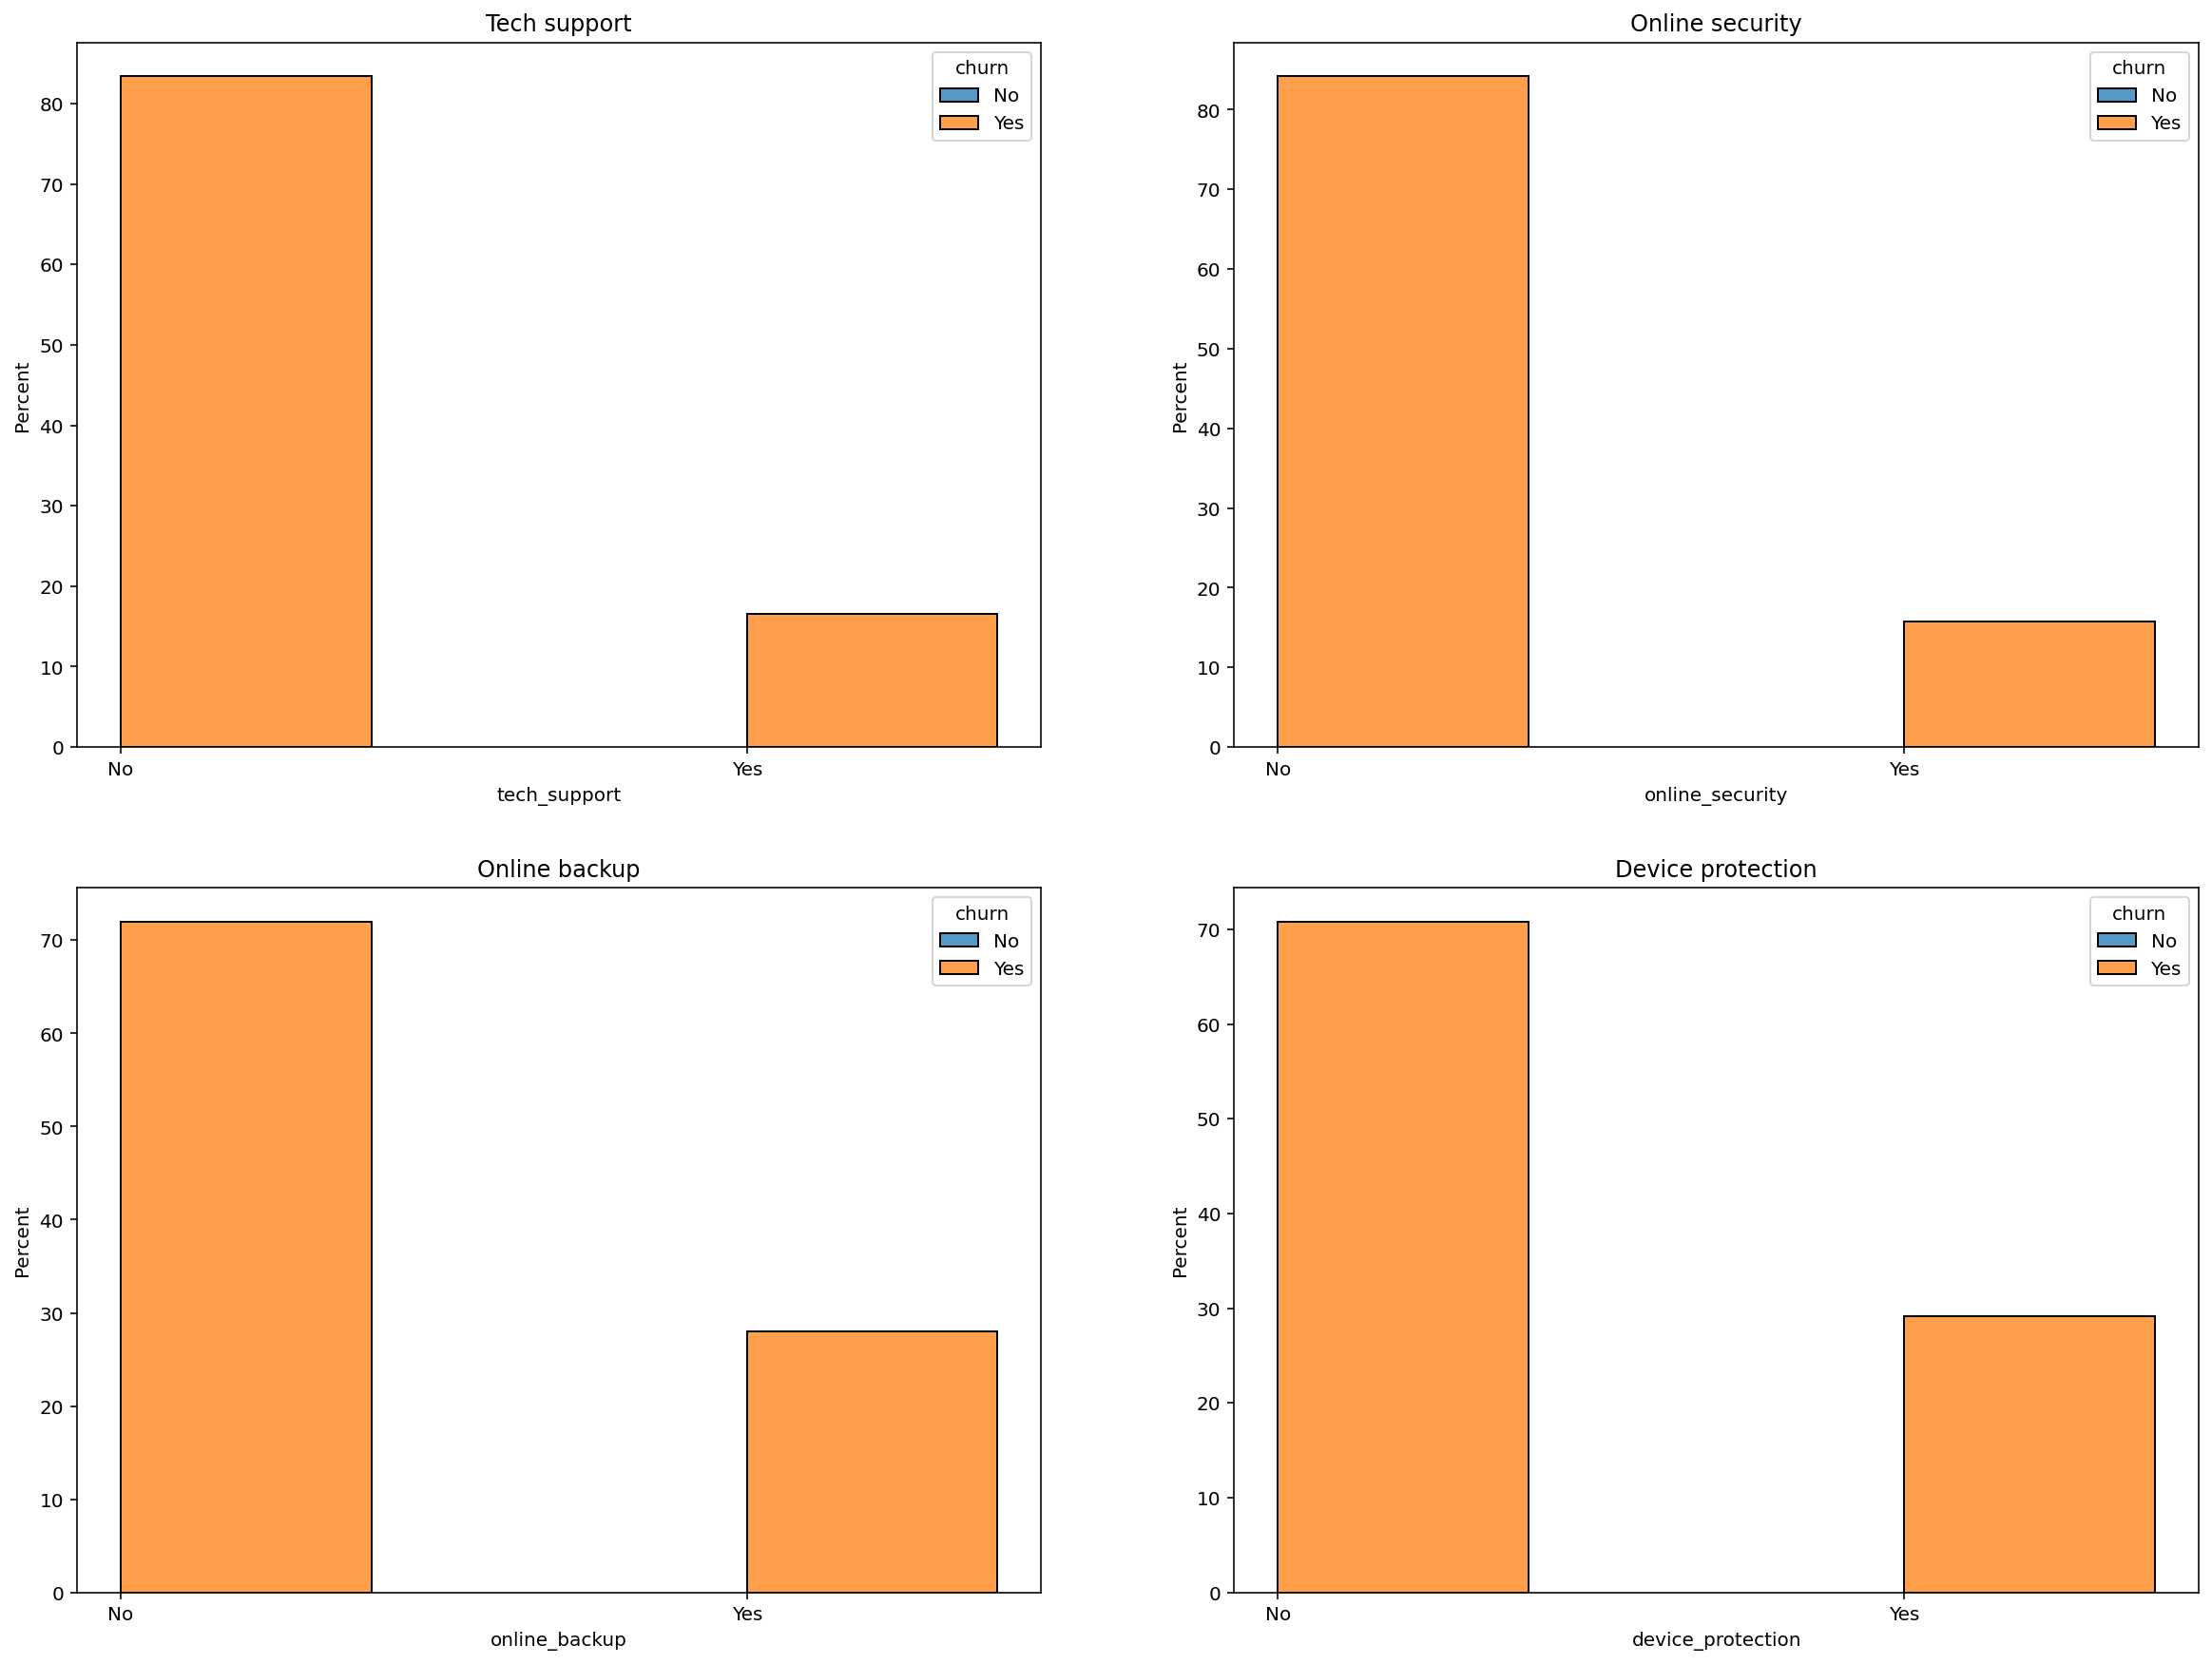

In [19]:
ex.service_visuals(churned)

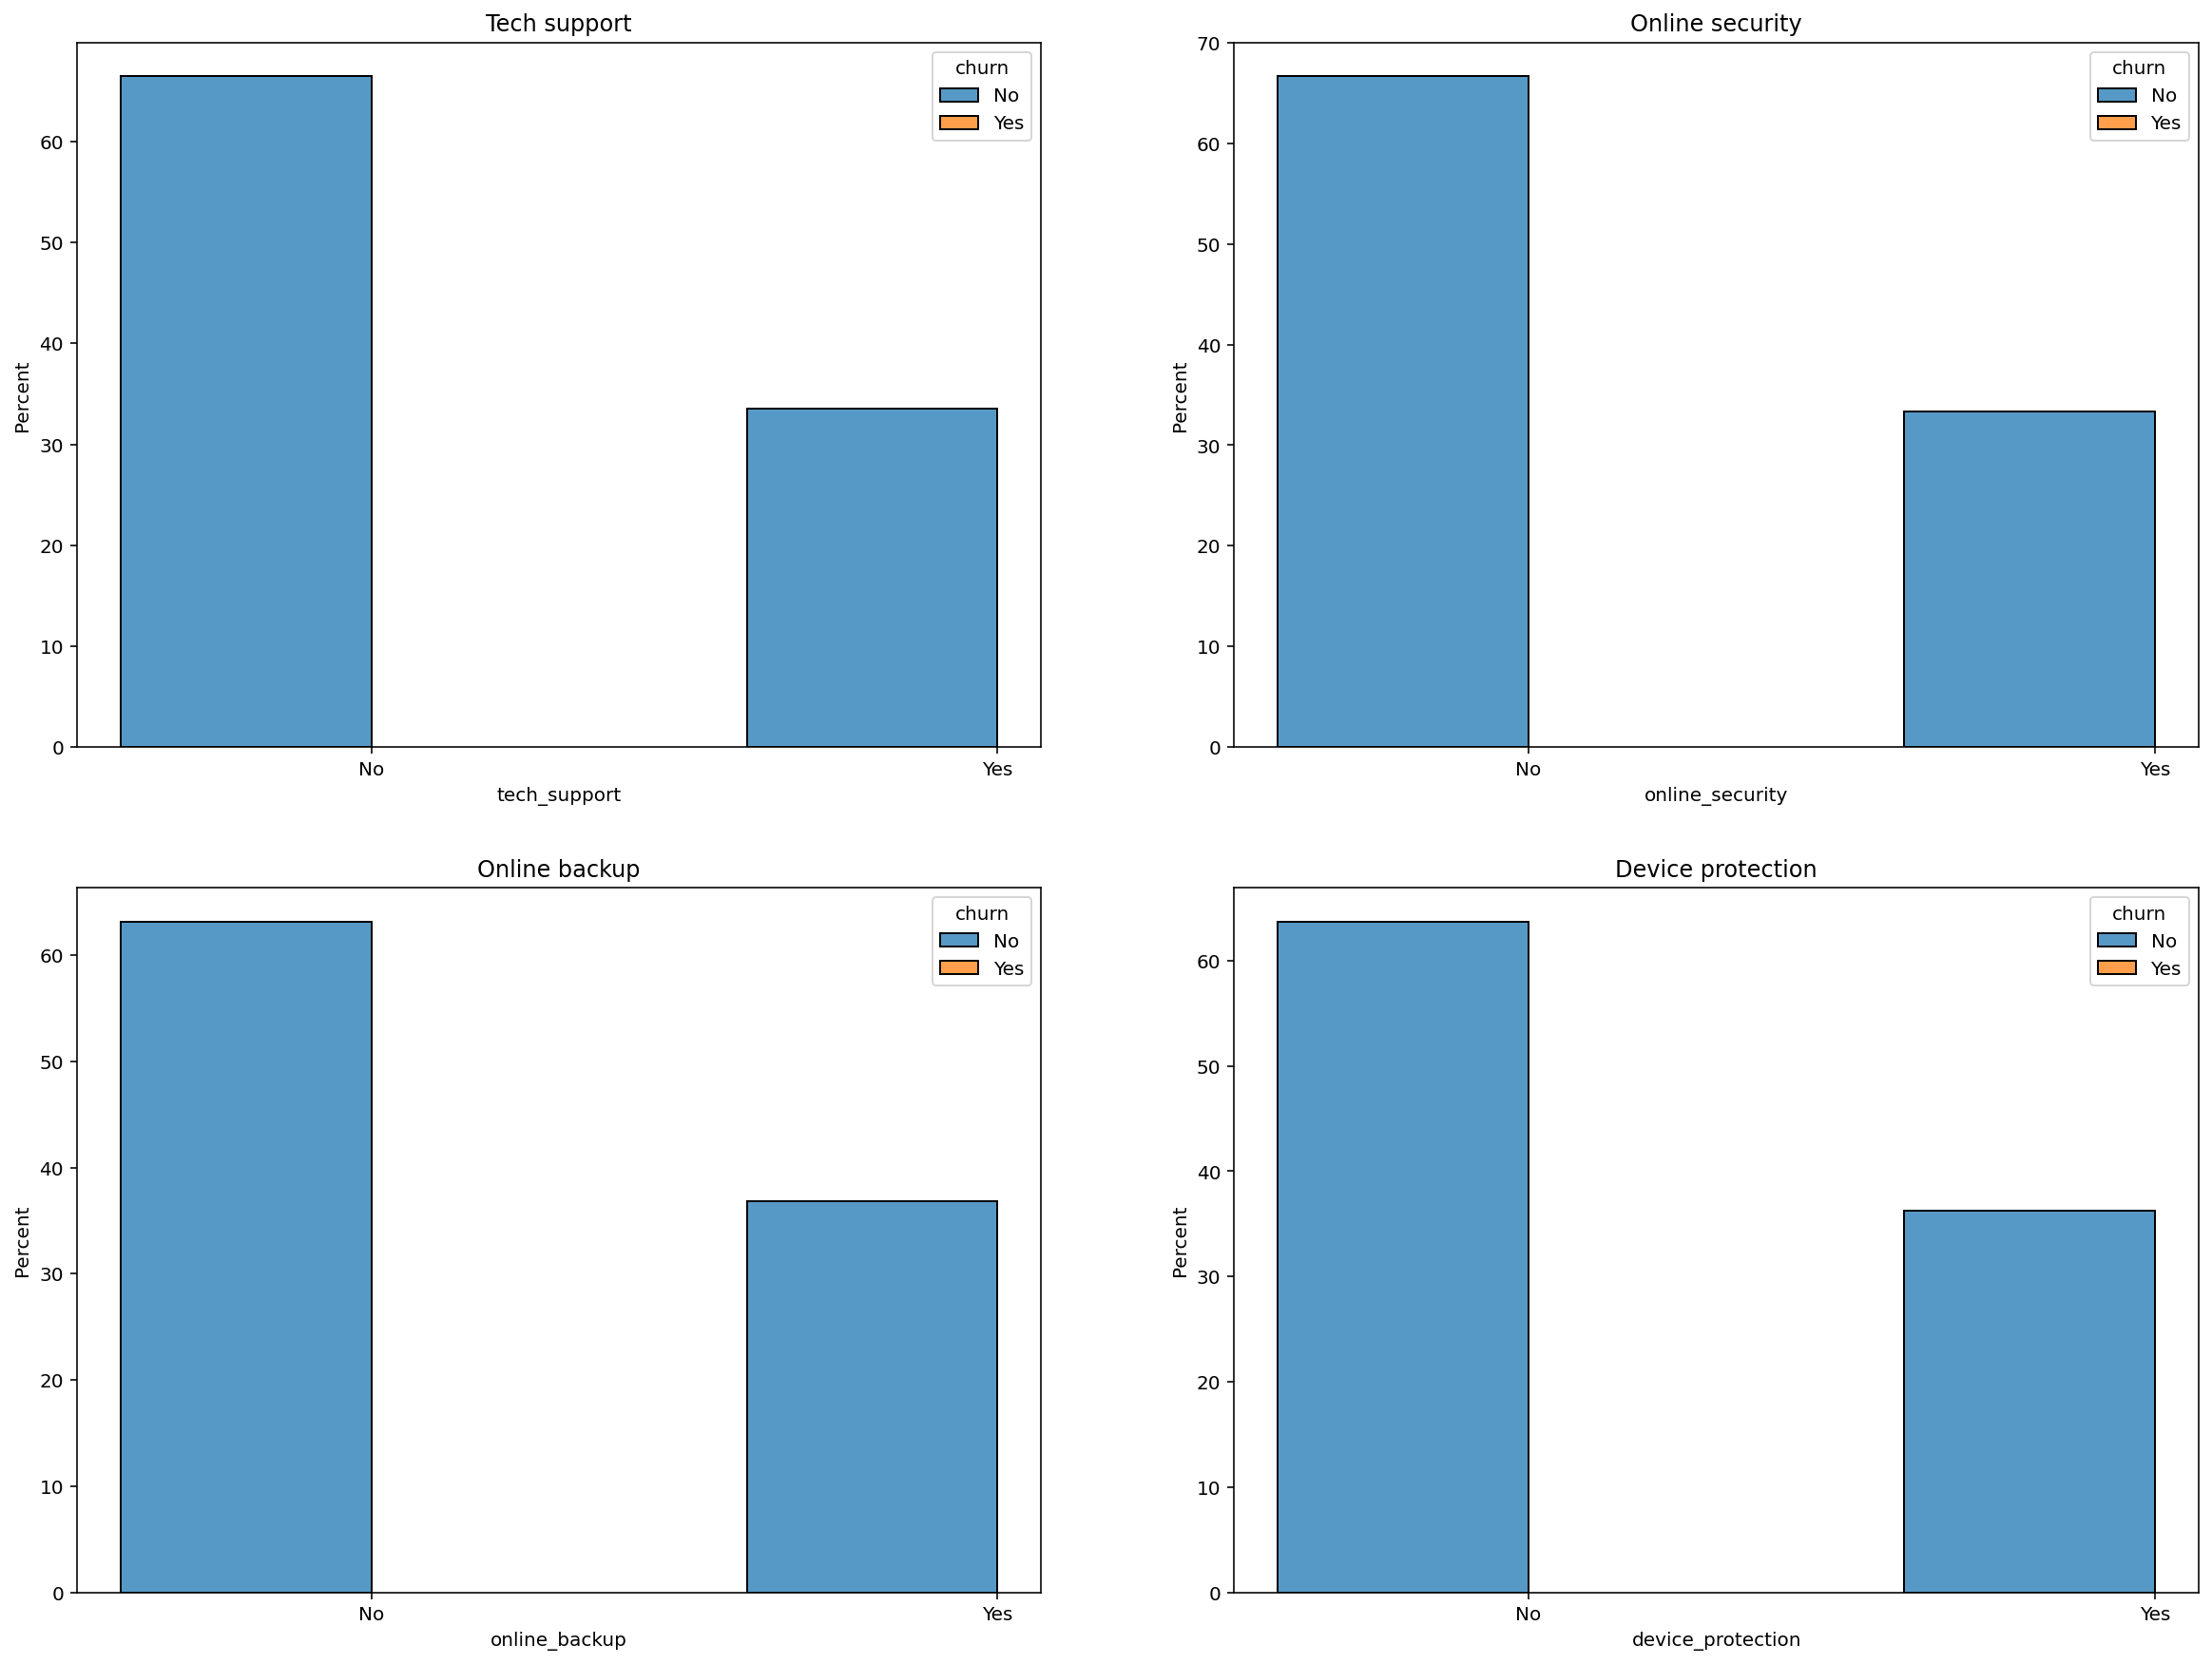

In [20]:
ex.service_visuals(not_churned)

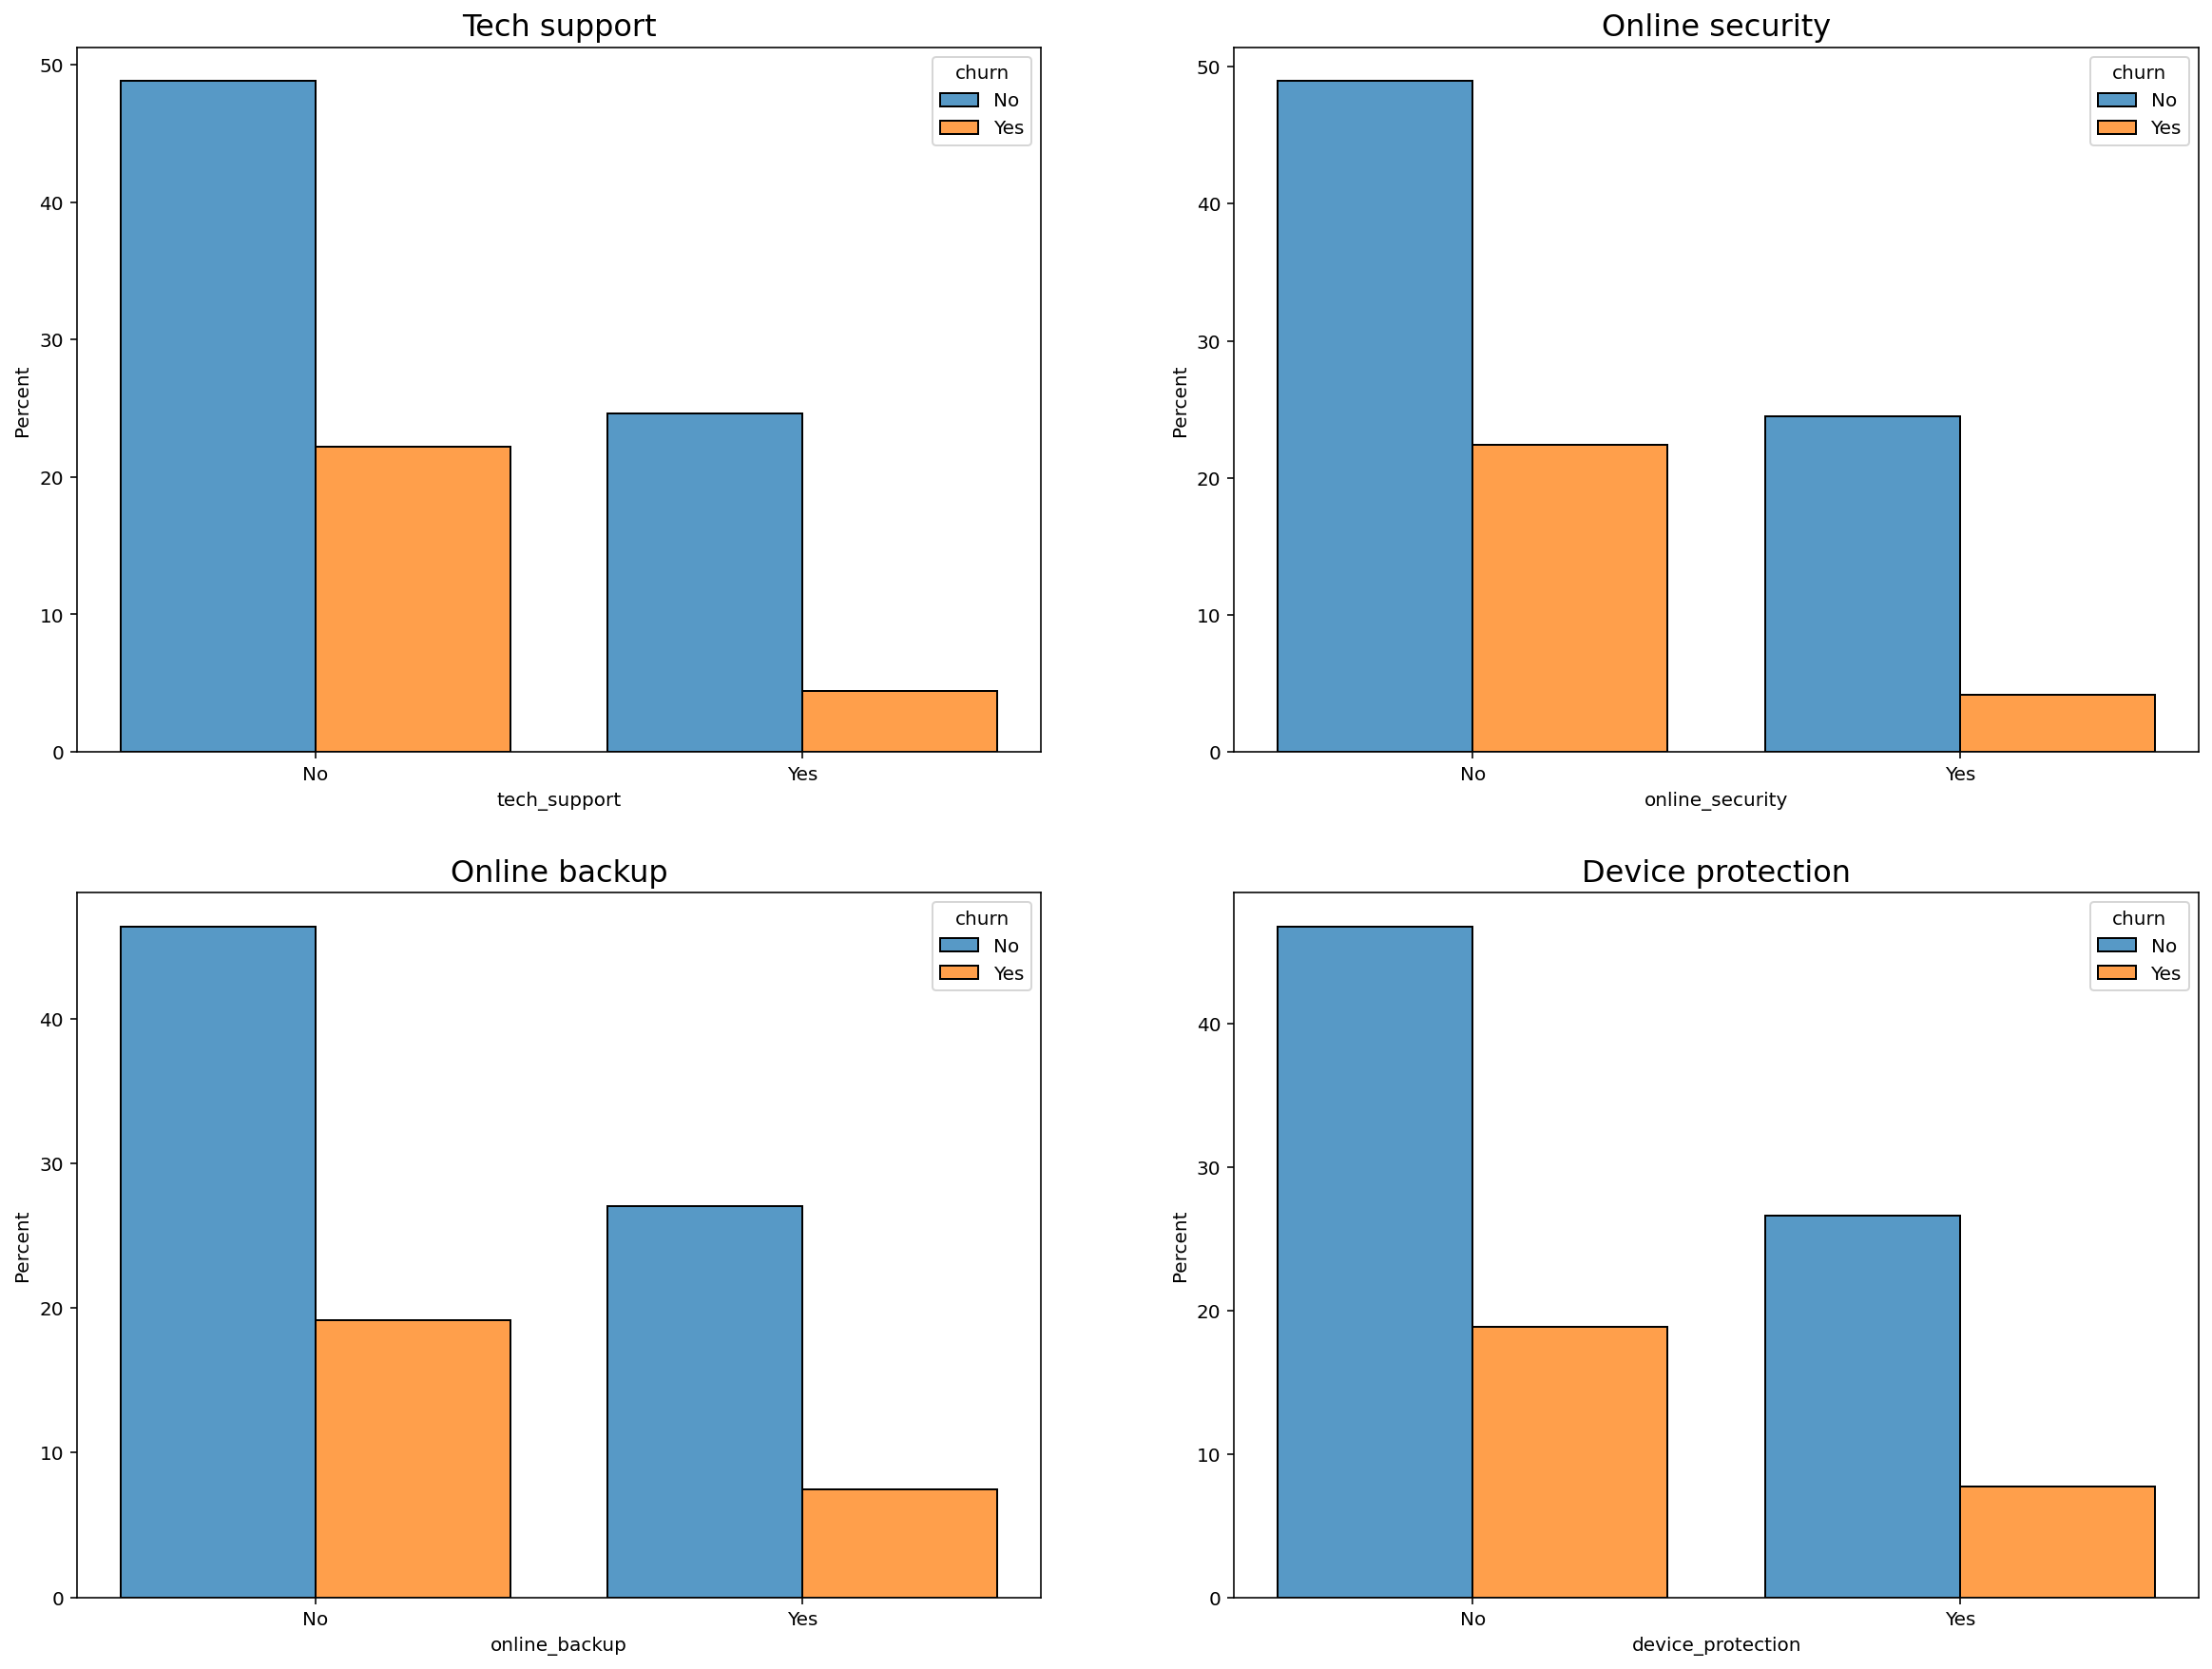

In [14]:
plt.figure(figsize = (20, 15))

plt.subplot(221)
#sns.countplot(data = churned, x = 'online_security')
sns.histplot(data = df, x="tech_support", hue="churn", stat="percent", multiple="dodge", shrink=.8)
#plt.xticks(ticks=["Current customers", 'Churned customers'])
plt.title('Tech support', fontsize=16)

plt.subplot(222)
#sns.countplot(data = churned, x = 'online_security')
sns.histplot(data = df, x="online_security", hue="churn", stat="percent", multiple="dodge", shrink=.8)
plt.title('Online security', fontsize=16)

plt.subplot(223)
#sns.countplot(data = churned, x = 'online_security')
sns.histplot(data = df, x="online_backup", hue="churn", stat="percent", multiple="dodge", shrink=.8)
plt.title('Online backup', fontsize=16)

plt.subplot(224)
#sns.countplot(data = churned, x = 'online_security')
sns.histplot(data = df, x="device_protection", hue="churn", stat="percent", multiple="dodge", shrink=.8)
plt.title('Device protection', fontsize=16)

plt.show()

### Is having phone or internet service leads to churn?
*phone_service and internet_service_type_ features analysis*

In [8]:
ex.phone_service_test(df)

There is not enough evidence that having a phone service included is associated with customer churn


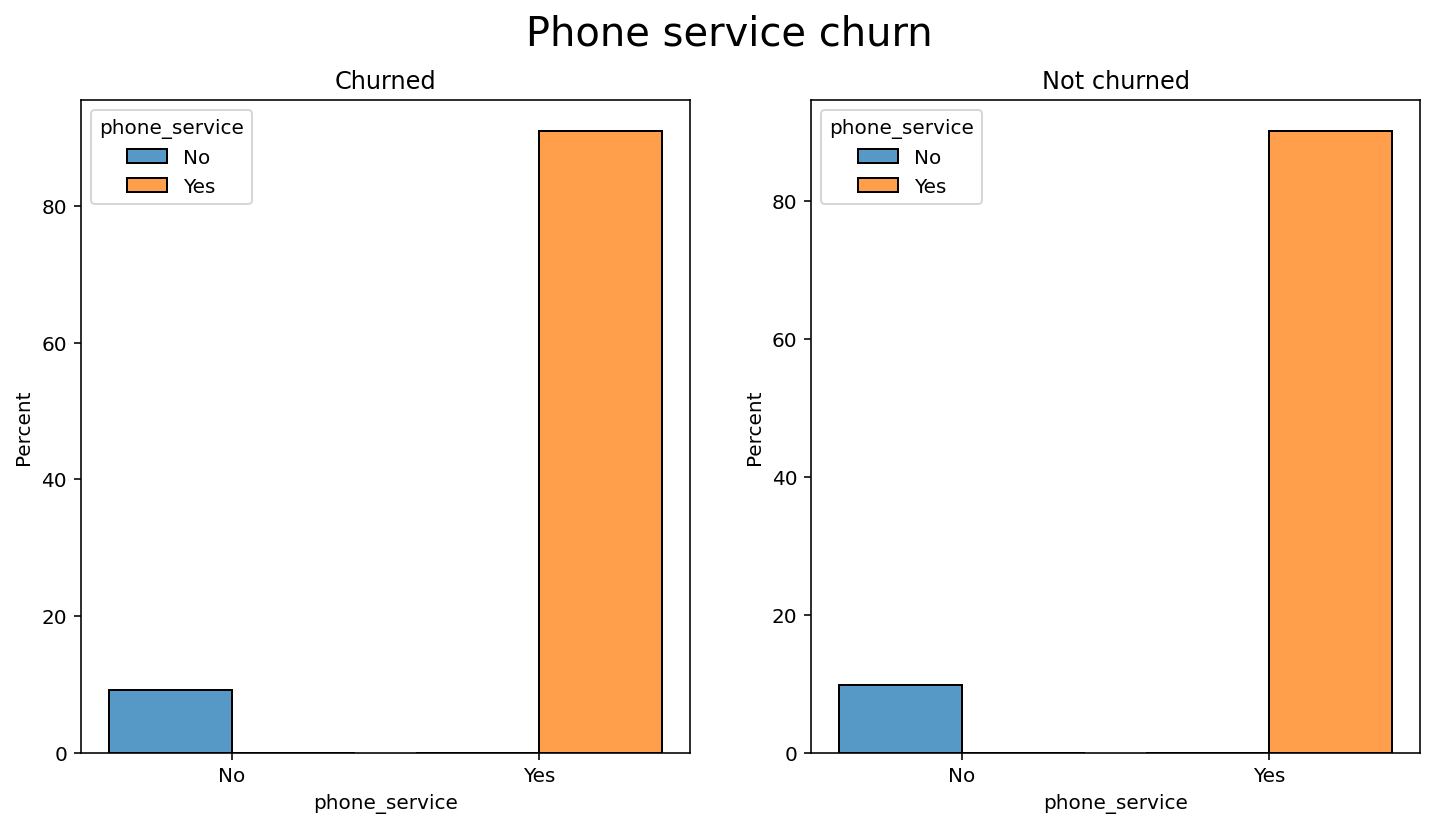

In [17]:
ex.visualize_phone_service(churned, not_churned)

## When do customers churn more?
*tenure feature analisys*

$H_0:$ there is no difference in how long customers that churn stay with the company

$H_a:$ there is difference in how long customers that churn stay with the company

There is difference in how long customers that churn stay with the company





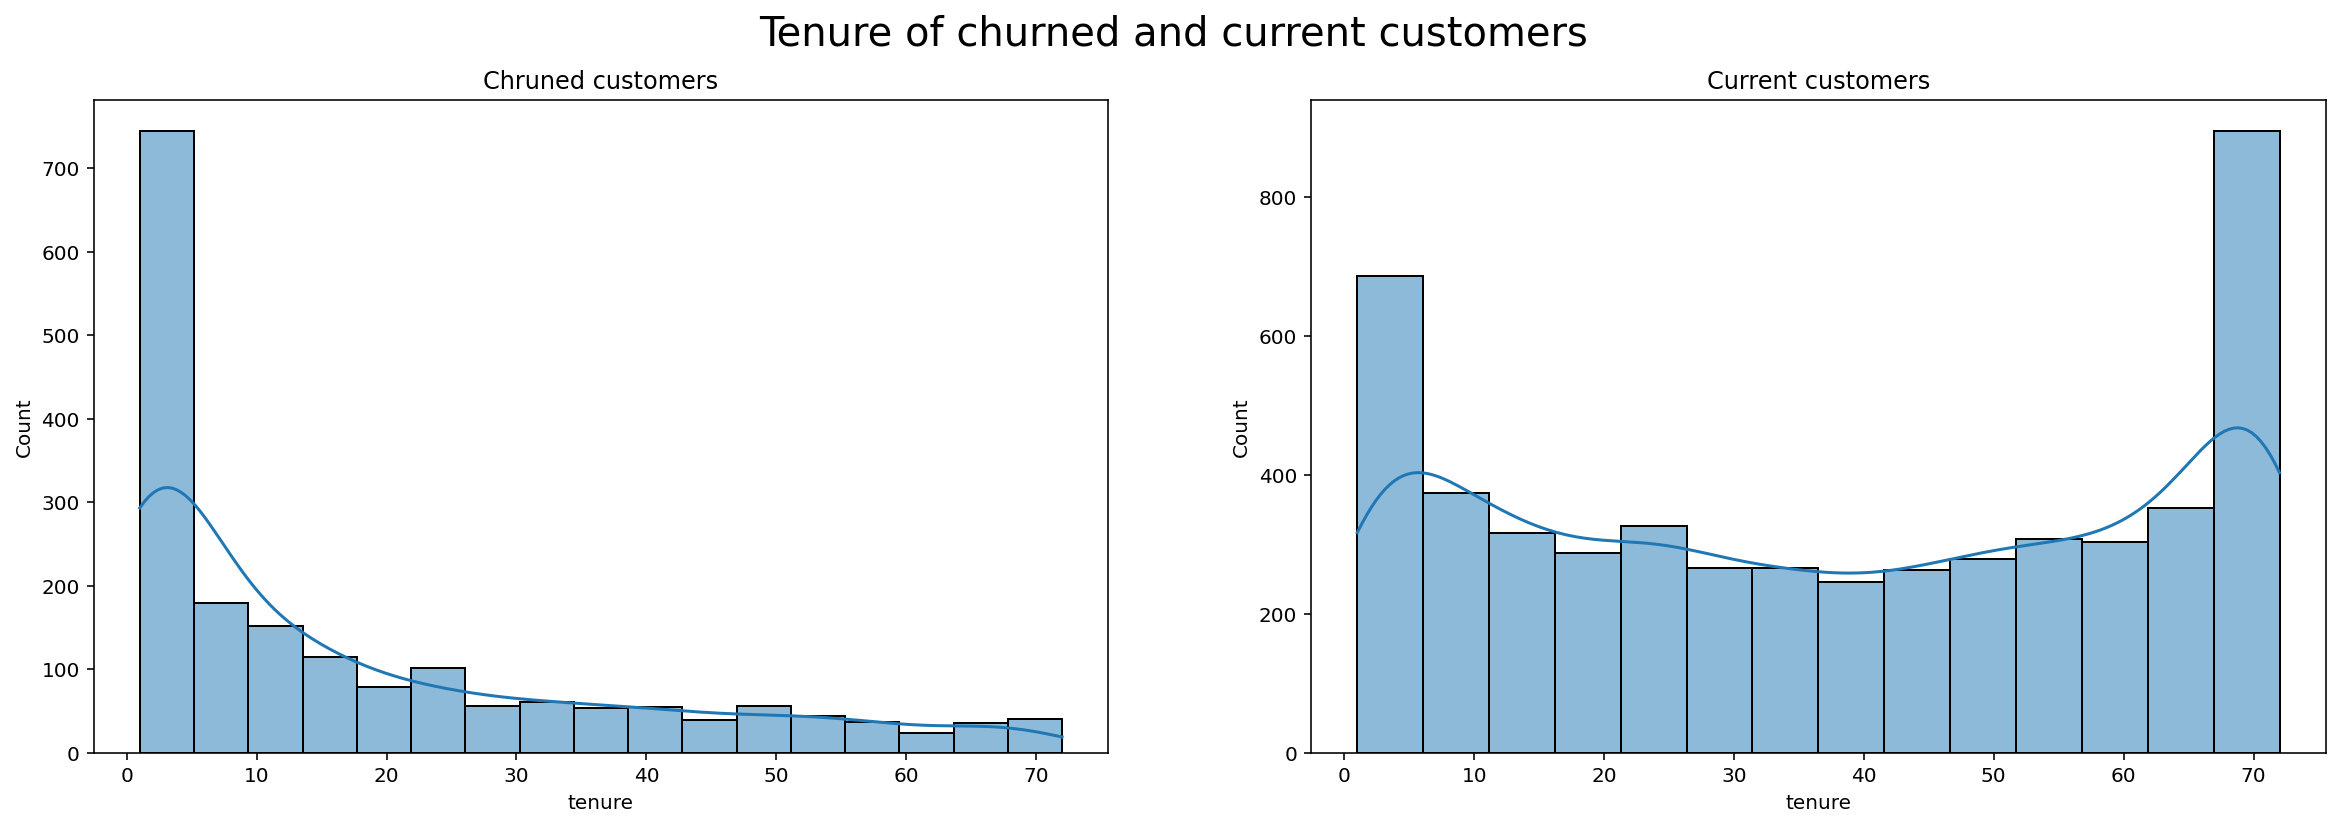

In [18]:
ex.explore_tenure(churned, not_churned)

Customers are more likely to churn during the first 2 years of their contract

### Does people who have a month-to-month contract churn more than those who have one year or two-year contracts
*contract_type feature analysis*

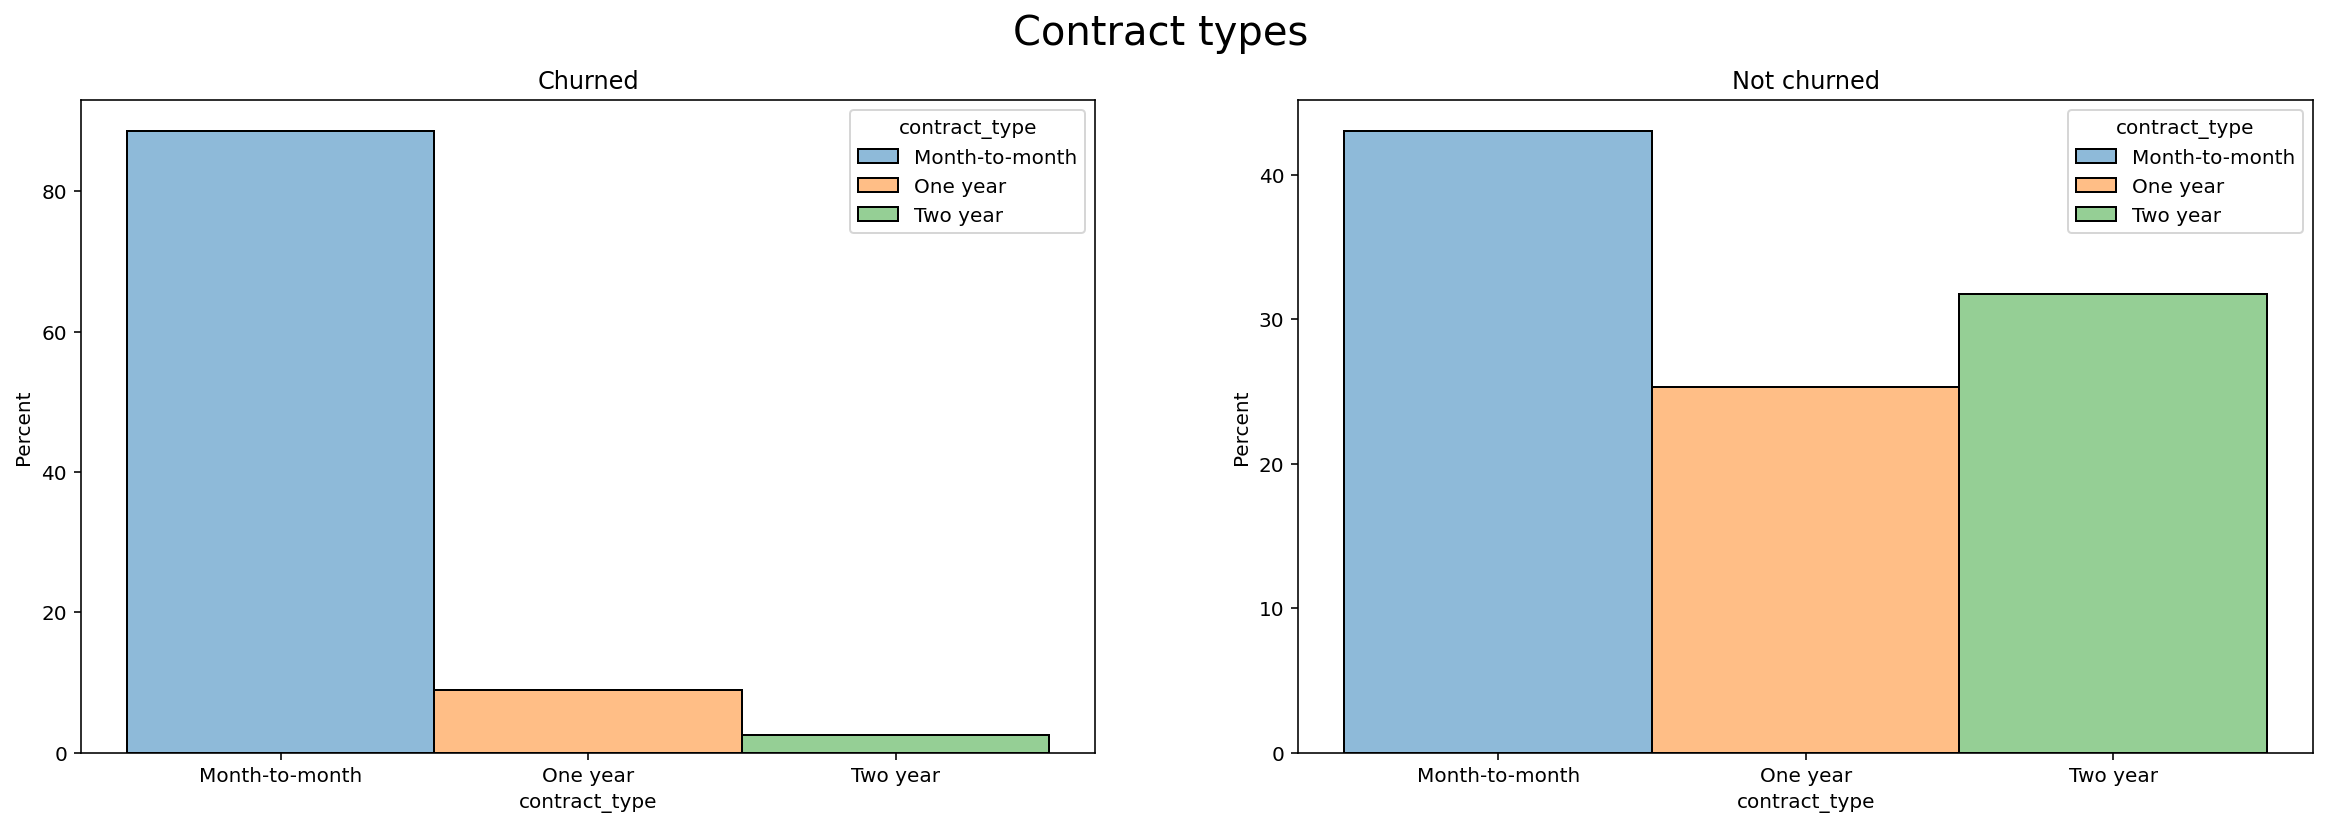

In [19]:
ex.visualize_contract_type(churned, not_churned)

## Does having high charges leads to churn?
*monthly_charges and total_charges features analysis*

In [ ]:
visualize_monthly_charges(churned, not_churned)

In [ ]:
stats.levene(churned.monthly_charges, not_churned.monthly_charges)

In [ ]:
test_monthly_charges(churned, not_churned)

There is a significant difference in monhtly charges between customers that churned and did not churn





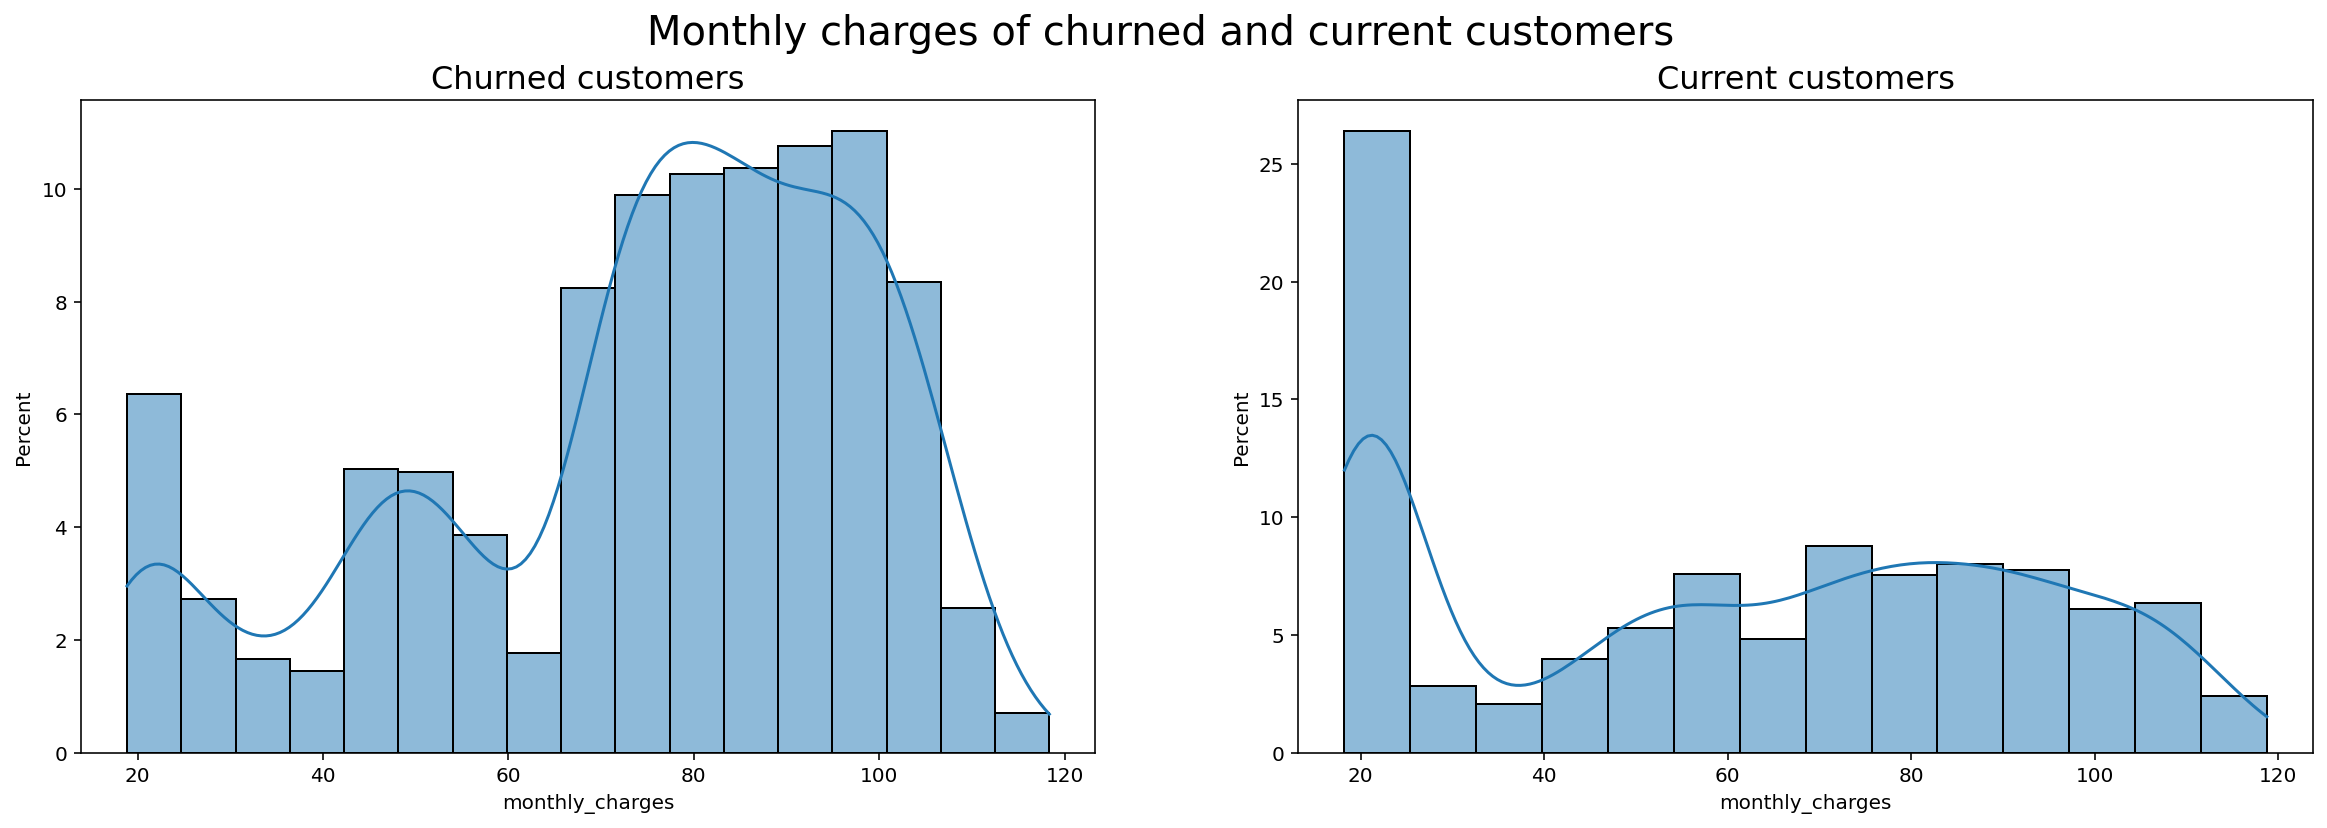

In [9]:
ex.explore_monthly_charges(churned, not_churned)

*We can see that customers  that had higher monthly charged churned more*

## You may use this as a template for how to ask and answer each question:

### 1) Question about the data
* Ask a question about the data for which you got a meaningful result
* There is no connection can be a meaningful result

### 2) Visualization of the data answering the question

* Visualizations should be accompanied by take-aways telling the reader exactly what you want them to get from the chart
* You can include theses as bullet points under the chart
* Use your chart title to provide the main take-away from each visualization
* Each visualization should answer one, and only one, of the explore questions

### 3) Statistical test
* Be sure you are using the correct statistical test for the type of variables you are testing
* Be sure that you are not violating any of the assumptions for the statistical test you are choosing
* Your notebook should run and produce the results of the test you are using (This may be done through imports)
* Include an introduction to the kind of test you are doing
* Include the Ho and Ha for the test
* Include the alpha you are using
* Include the readout of the p-value for the test
* Interpret the results of the test in natural language (I reject the null hypothesis is not sufficient)

### 4) Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

## Exploration Summary
* After your explore section, before you start modeling, provide a summary of your findings in Explore
* Include a summary of your take-aways
* Include a summary of the features you examined and weather or not you will be going to Modeling with each feature and why
* It is important to note which features will be going into your model so the reader knows what features you are using to model on

Drop total charges, gender, senior_citizen, phone_services, partner and dependents 

In [22]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

## Modeling

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

Positive case: Customer churned
Negative case: Customer didn't churn

True positive: We predicted that customer going to churn and they churned.
False positive: We predicted that customer going to churn but they stayed.
True negative: We predicted that customer didn't churn and they didn't
False negative: We predicted that customer didn't churn but they did.

For the company is going to be more costly to get False negative results, when we predict that customer won't churn, but they did. Based on this I pick the recall for the model evaluation.

$Recall = \frac{TP}{(TP + FN)}$

In addition to the recall the use a baseline score. If the model get smaller recall score than a baseline score, it fails the test. Baseline score is based on the most common value.

In [28]:
df1 = df

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customer_id                7032 non-null   object  
 1   gender                     7032 non-null   category
 2   senior_citizen             7032 non-null   uint8   
 3   partner                    7032 non-null   category
 4   dependents                 7032 non-null   category
 5   tenure                     7032 non-null   int64   
 6   phone_service              7032 non-null   category
 7   multiple_lines             7032 non-null   uint8   
 8   online_security            7032 non-null   uint8   
 9   online_backup              7032 non-null   uint8   
 10  device_protection          7032 non-null   uint8   
 11  tech_support               7032 non-null   uint8   
 12  streaming_tv               7032 non-null   uint8   
 13  streaming_movies           7032 n

In [39]:
service_features = sf

In [53]:
def dummies_telco(dataframe):
    '''
    creates dummies and
    drops not numerical columns (except 'churn') 
    '''
    
    # Convert binary categorical variables to numeric
    
    dataframe['paperless_billing'] = dataframe.paperless_billing.map({'Yes': 1, 'No': 0}).astype('uint8')
    dataframe['churn'] = dataframe.churn.map({'Yes': 1, 'No': 0}).astype('uint8')
    

    for col in service_features:
        dataframe[col] = dataframe[col].map({'Yes': 1, 'No': 0}).astype('uint8')
        print(col)
    
    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(dataframe[['contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    
    # Concatenate dummy dataframe to original 
    dataframe1 = pd.concat([dataframe, dummy_df], axis=1)

    #drop unneeded columns
    dataframe1.drop(columns = ['gender', 'senior_citizen', 'partner', 'dependents',\
                     'gender', 'partner', 'dependents', 'phone_service', \
                    'total_charges', 'contract_type', 'internet_service_type', 'payment_type'],
                   inplace = True)
    
    return dataframe1

In [18]:
df1.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,paperless_billing_encoded
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,0,0,1,...,1,0,Yes,65.6,593.30,0,One year,DSL,Mailed check,1
1,0003-MKNFE,Male,0,No,No,9,Yes,1,0,0,...,0,1,No,59.9,542.40,0,Month-to-month,DSL,Mailed check,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,0,0,0,...,0,0,Yes,73.9,280.85,1,Month-to-month,Fiber optic,Electronic check,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,0,0,1,...,1,1,Yes,98.0,1237.85,1,Month-to-month,Fiber optic,Electronic check,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,0,0,0,...,1,0,Yes,83.9,267.40,1,Month-to-month,Fiber optic,Mailed check,1


In [43]:
df1.paperless_billing.unique()

array([1, 0], dtype=uint8)

In [54]:
dummies = dummies_telco(df1)

device_protection
tech_support
multiple_lines
streaming_movies
online_backup
streaming_tv
online_security


In [55]:
dummies.head(5).T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
tenure,9,9,4,13,3
multiple_lines,0,1,0,0,0
online_security,0,0,0,0,0
online_backup,1,0,0,1,0
device_protection,0,0,1,1,0
tech_support,1,0,0,0,1
streaming_tv,1,0,0,1,1
streaming_movies,0,1,0,1,0
paperless_billing,1,0,1,1,1


Split the table in train, validate and test data sets.

In [56]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wr.full_split(dummies, 'churn')

In [57]:
#get the customer ids from the test data set. We'll need it for the *.csv file
customer_ids = X_test.customer_id

In [58]:
#drop customer_id from all columns
X_train.drop(columns = 'customer_id', inplace=True)
X_validate.drop(columns = 'customer_id', inplace=True)
X_test.drop(columns = 'customer_id', inplace=True)

In [59]:
#baseline
baseline_score = (y_train == int(y_train.mode())).mean()

In [60]:
y_train.value_counts(normalize=True).max()

0.7343154686309372

In [61]:
baseline_score

0.7343154686309372

Baseline score is equal to 0.7343. So, our model has to get better scorethan 0.73

In [62]:
# If you use code to generate your baseline run the code and generate the output here
X_train.columns

Index(['tenure', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check'],
      dtype='object')

## Decision Tree Models

In [78]:
dt1 = DecisionTreeClassifier(max_depth = 3, random_state=2912)
dt1.fit(X_train, y_train)
dt1_predictions = dt1.predict(X_train)
cm1 = confusion_matrix(y_train, dt1_predictions)

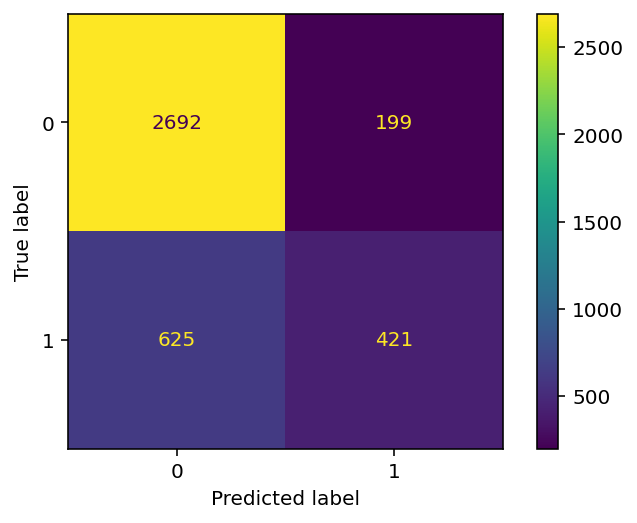

In [64]:
md.display_cm(cm1)

In [65]:
scores = md.count_scores(cm1, 'Decision Tree - 1')

In [66]:
scores

,Score Name,Decision Tree - 1
0,Accuracy,0.79
1,True Positive Rate /Recall,0.40
2,False Positive Rate,0.07
3,True Negative Rate,0.93
4,False Negative Rate,0.60
5,Precision,0.68
6,F1 Score,0.50
7,Support Positive,1046.00
8,Support Negative,2891.00


In [73]:
X_train.columns

Index(['tenure', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check'],
      dtype='object')

In [76]:
features = ['tenure', 'internet_service_type_None']
dt2 = DecisionTreeClassifier(max_depth = 3, random_state=2912)
dt2.fit(X_train[features], y_train)
dt2_predictions = dt2.predict(X_train[features])
cm2 = confusion_matrix(y_train, dt2_predictions)

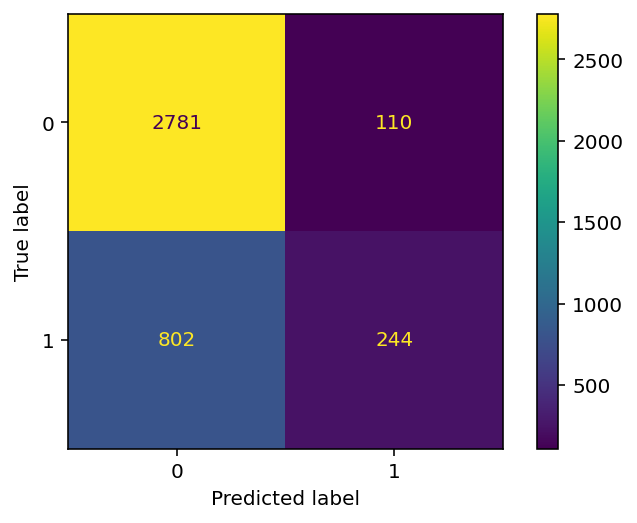

In [77]:
md.display_cm(cm2)

In [69]:
scores['Decision Tree - 2'] = md.count_scores(cm2, 'Decision Tree - 2').iloc[:,1]

In [70]:
scores

,Score Name,Decision Tree - 1,Decision Tree - 2
0,Accuracy,0.79,0.77
1,True Positive Rate /Recall,0.40,0.23
2,False Positive Rate,0.07,0.04
3,True Negative Rate,0.93,0.96
4,False Negative Rate,0.60,0.77
5,Precision,0.68,0.69
6,F1 Score,0.50,0.34
7,Support Positive,1046.00,1046.00
8,Support Negative,2891.00,2891.00


,Score Name,Decision Tree - 1,Decision Tree - 2,Decision Tree - 3
0,Accuracy,0.79,0.77,0.73
1,True Positive Rate /Recall,0.40,0.23,0.00
2,False Positive Rate,0.07,0.04,0.00
3,True Negative Rate,0.93,0.96,1.00
4,False Negative Rate,0.60,0.77,1.00
5,Precision,0.68,0.69,NaN
6,F1 Score,0.50,0.34,NaN
7,Support Positive,1046.00,1046.00,1046.00
8,Support Negative,2891.00,2891.00,2891.00


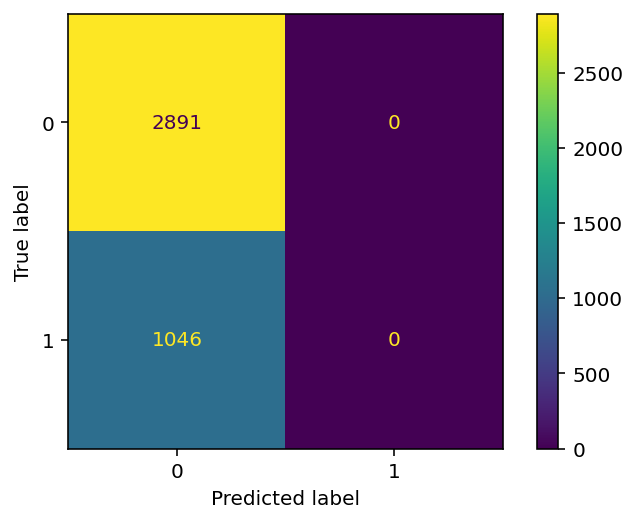

In [75]:
dt3 = DecisionTreeClassifier(max_depth = 3, random_state=2912)
dt3.fit(X_train[sf], y_train)
dt3_predictions = dt3.predict(X_train[sf])
cm3 = confusion_matrix(y_train, dt3_predictions)
md.display_cm(cm3)
scores['Decision Tree - 3'] = md.count_scores(cm3, 'Decision Tree - 3').iloc[:,1]
scores

### Random Forest

In [81]:
features4 = ['contract_type_One year', 'contract_type_Two year',\
             'internet_service_type_Fiber optic', 'internet_service_type_None', \
             'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']

,Score Name,Decision Tree - 1,Decision Tree - 2,Decision Tree - 3,Random Forest - 4
0,Accuracy,0.79,0.77,0.73,0.77
1,True Positive Rate /Recall,0.40,0.23,0.00,0.42
2,False Positive Rate,0.07,0.04,0.00,0.10
3,True Negative Rate,0.93,0.96,1.00,0.90
4,False Negative Rate,0.60,0.77,1.00,0.58
5,Precision,0.68,0.69,NaN,0.60
6,F1 Score,0.50,0.34,NaN,0.49
7,Support Positive,1046.00,1046.00,1046.00,1046.00
8,Support Negative,2891.00,2891.00,2891.00,2891.00


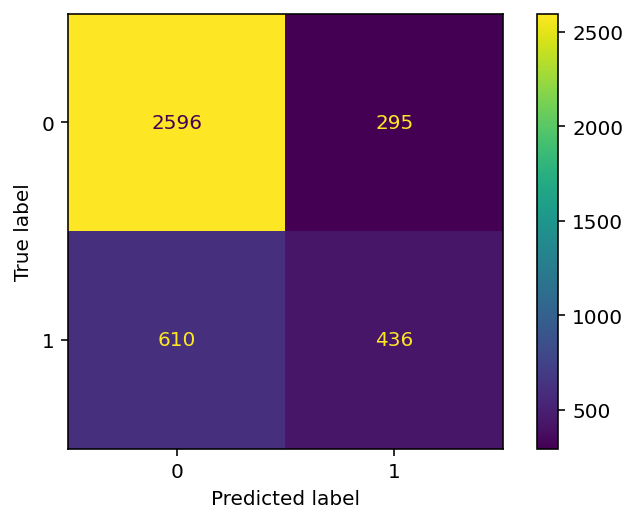

In [85]:
rf4 = RandomForestClassifier(max_depth=5, min_samples_leaf=1, random_state=2912)
rf4.fit(X_train[features4], y_train)
rf4_predictions = rf4.predict(X_train[features4])
cm4 = confusion_matrix(y_train, rf4_predictions)
md.display_cm(cm4)
scores['Random Forest - 4'] = md.count_scores(cm4, 'Random Forest - 4').iloc[:,1]
scores

,Score Name,Decision Tree - 1,Decision Tree - 2,Decision Tree - 3,Random Forest - 4,Random Forest - 5
0,Accuracy,0.79,0.77,0.73,0.77,0.80
1,True Positive Rate /Recall,0.40,0.23,0.00,0.42,0.42
2,False Positive Rate,0.07,0.04,0.00,0.10,0.06
3,True Negative Rate,0.93,0.96,1.00,0.90,0.94
4,False Negative Rate,0.60,0.77,1.00,0.58,0.58
5,Precision,0.68,0.69,NaN,0.60,0.71
6,F1 Score,0.50,0.34,NaN,0.49,0.53
7,Support Positive,1046.00,1046.00,1046.00,1046.00,1046.00
8,Support Negative,2891.00,2891.00,2891.00,2891.00,2891.00


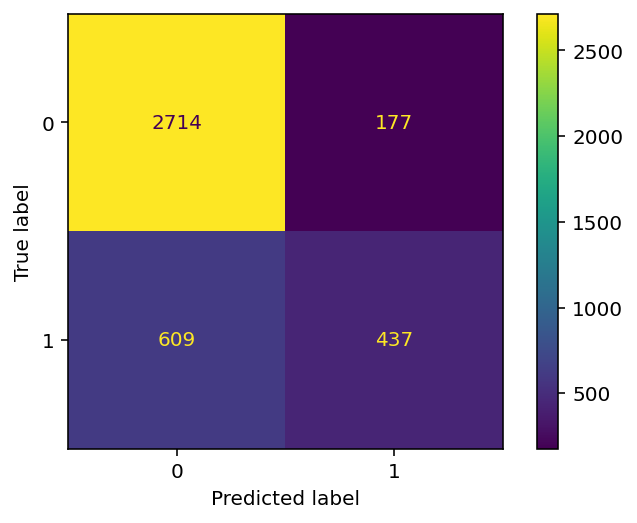

In [88]:
rf5 = RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=2912)
rf5.fit(X_train, y_train)
rf5_predictions = rf5.predict(X_train)
cm5 = confusion_matrix(y_train, rf5_predictions)
md.display_cm(cm5)
scores['Random Forest - 5'] = md.count_scores(cm5, 'Random Forest - 4').iloc[:,1]
scores

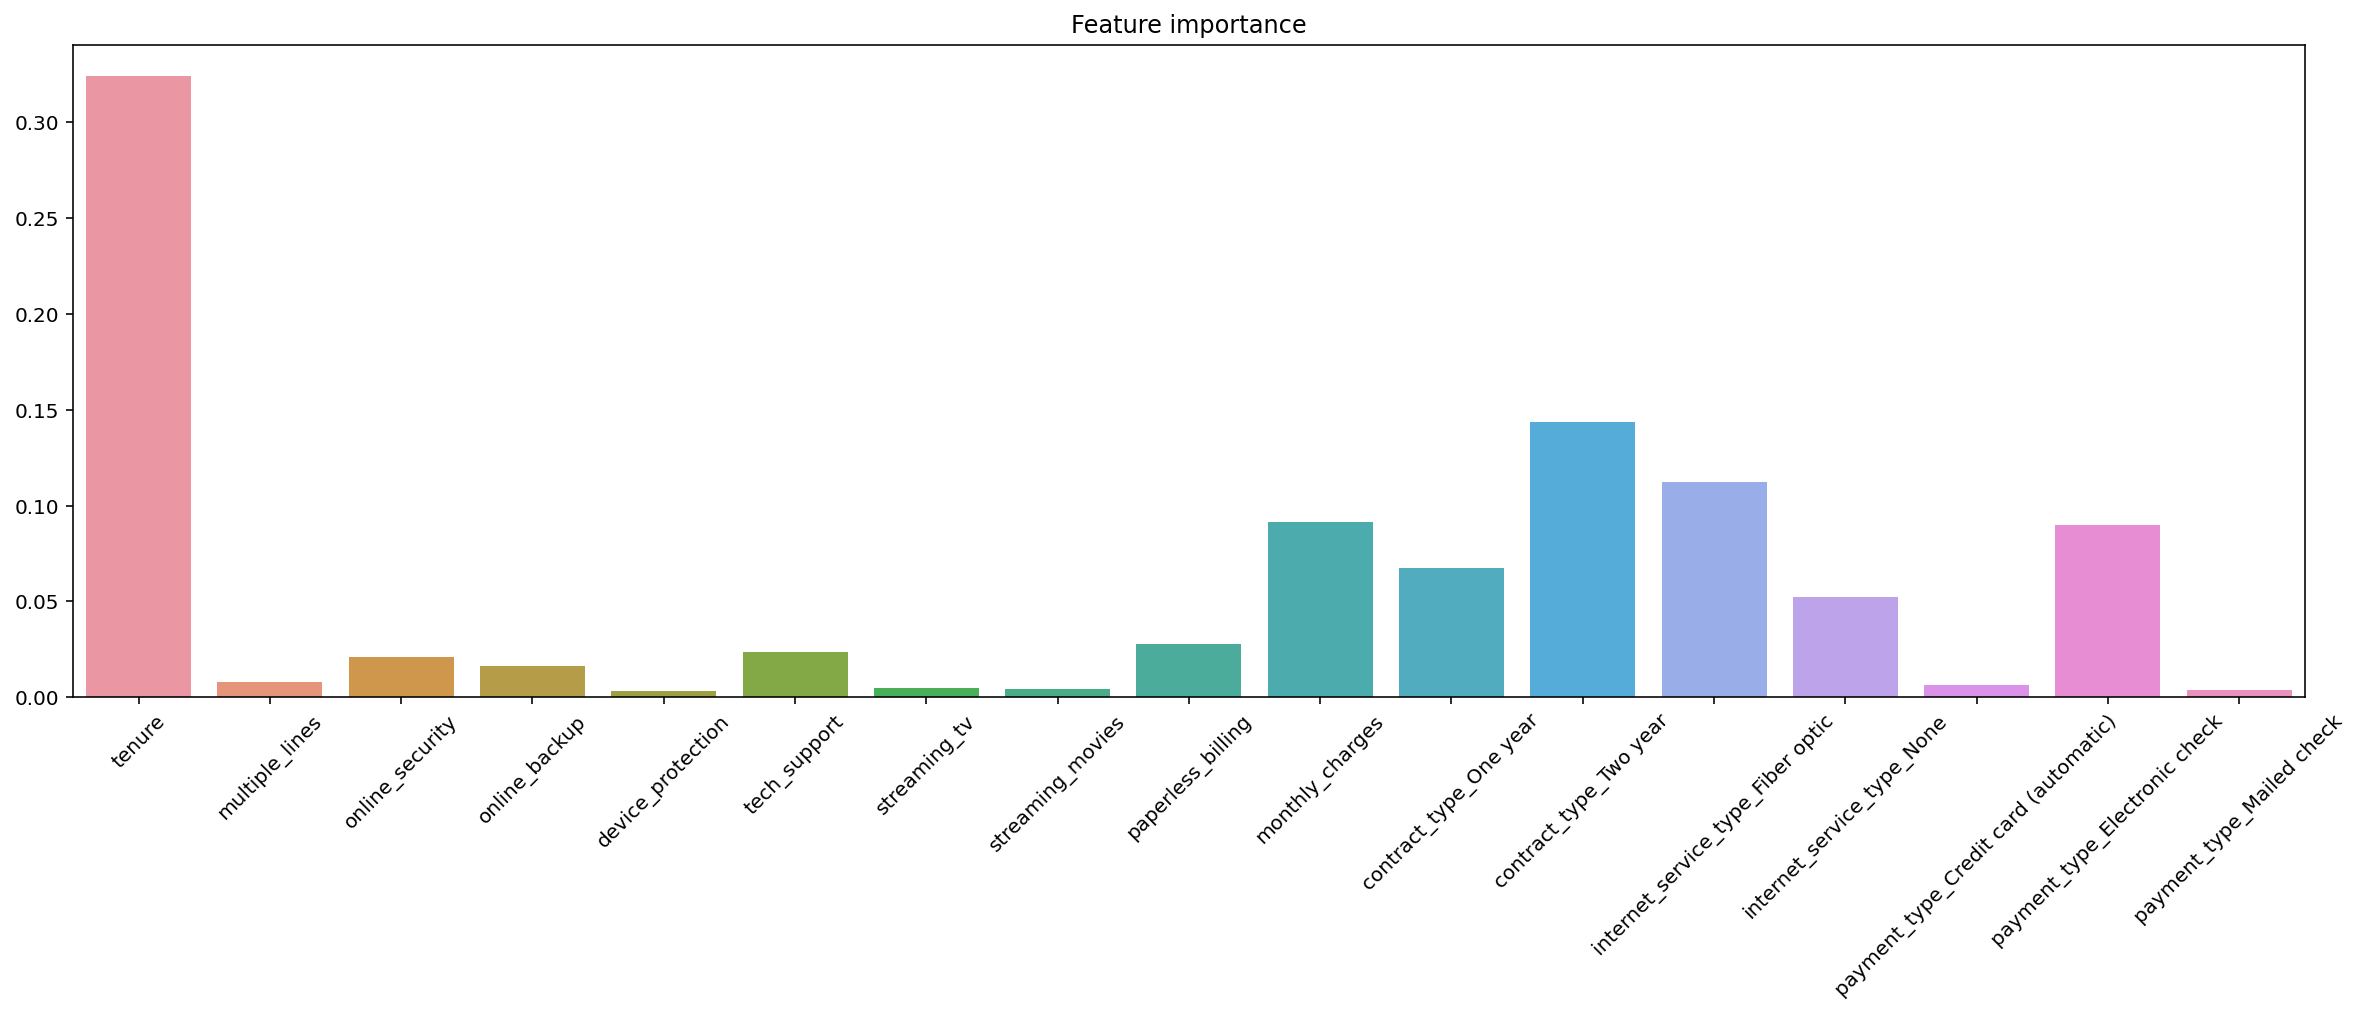

In [89]:
plt.figure(figsize = (20, 6))
#plt.bar(X_train.columns, rf.feature_importances_)
sns.barplot(x = X_train.columns, y = rf5.feature_importances_)
plt.xticks(rotation = 45)
plt.title('Feature importance')
plt.show()

In [101]:
features6 = ['tenure', 'contract_type_One year', 'contract_type_Two year', 'payment_type_Credit card (automatic)']

,Score Name,Decision Tree - 1,Decision Tree - 2,Decision Tree - 3,Random Forest - 4,Random Forest - 5,Random Forest - 6
0,Accuracy,0.79,0.77,0.73,0.77,0.80,0.77
1,True Positive Rate /Recall,0.40,0.23,0.00,0.42,0.42,0.37
2,False Positive Rate,0.07,0.04,0.00,0.10,0.06,0.09
3,True Negative Rate,0.93,0.96,1.00,0.90,0.94,0.91
4,False Negative Rate,0.60,0.77,1.00,0.58,0.58,0.63
5,Precision,0.68,0.69,NaN,0.60,0.71,0.60
6,F1 Score,0.50,0.34,NaN,0.49,0.53,0.46
7,Support Positive,1046.00,1046.00,1046.00,1046.00,1046.00,1046.00
8,Support Negative,2891.00,2891.00,2891.00,2891.00,2891.00,2891.00


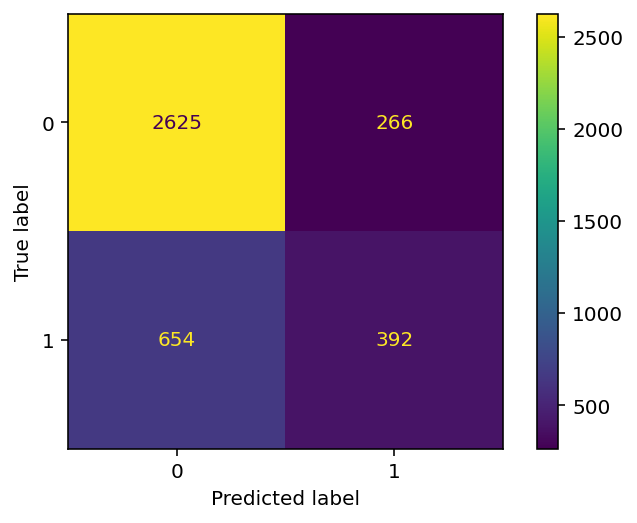

In [107]:
rf6 = RandomForestClassifier(max_depth=7, min_samples_leaf=3, random_state=2912)
rf6.fit(X_train[features6], y_train)
rf6_predictions = rf6.predict(X_train[features6])
cm6 = confusion_matrix(y_train, rf6_predictions)
md.display_cm(cm6)
scores['Random Forest - 6'] = md.count_scores(cm6, 'Random Forest - 6').iloc[:,1]
scores

## KNN

In [112]:
rates = scores.iloc[:, 0].tolist()

In [109]:
scores[['Score Name']]

,Score Name
0,Accuracy
1,True Positive Rate /Recall
2,False Positive Rate
3,True Negative Rate
4,False Negative Rate
5,Precision
6,F1 Score
7,Support Positive
8,Support Negative


In [138]:
knn_scores = pd.DataFrame(index = rates).reset_index()

In [139]:
knn_scores

,index
0,Accuracy
1,True Positive Rate /Recall
2,False Positive Rate
3,True Negative Rate
4,False Negative Rate
5,Precision
6,F1 Score
7,Support Positive
8,Support Negative


In [140]:
#features 6
for i in range(2, 16):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train[features6], y_train)
    knn_predictions = knn.predict(X_train[features6])
    cm_knn = confusion_matrix(y_train, knn_predictions)
    s = 'knn ' + str(i)
    knn_scores[s] = md.count_scores(cm_knn, s).iloc[:,1]

In [145]:
features_knn = ['tenure', 'contract_type_One year', 'contract_type_Two year', 'monthly_charges']
for i in range(2, 16):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train[features_knn], y_train)
    knn_predictions = knn.predict(X_train[features_knn])
    cm_knn = confusion_matrix(y_train, knn_predictions)
    s = 'knn ' + str(i)
    knn_scores[s] = md.count_scores(cm_knn, s).iloc[:,1]

In [146]:
knn_scores

,index,knn 2,knn 3,knn 4,knn 5,knn 6,knn 7,knn 8,knn 9,knn 10,knn 11,knn 12,knn 13,knn 14,knn 15
0,Accuracy,0.86,0.86,0.84,0.83,0.82,0.82,0.81,0.81,0.81,0.81,0.81,0.81,0.81,0.81
1,True Positive Rate /Recall,0.48,0.69,0.48,0.61,0.46,0.54,0.46,0.53,0.45,0.52,0.46,0.51,0.46,0.50
2,False Positive Rate,0.00,0.08,0.04,0.09,0.05,0.09,0.06,0.08,0.06,0.08,0.06,0.09,0.07,0.08
3,True Negative Rate,1.00,0.92,0.96,0.91,0.95,0.91,0.94,0.92,0.94,0.92,0.94,0.91,0.93,0.92
4,False Negative Rate,0.52,0.31,0.52,0.39,0.54,0.46,0.54,0.47,0.55,0.48,0.54,0.49,0.54,0.50
5,Precision,0.99,0.76,0.83,0.71,0.76,0.70,0.75,0.70,0.73,0.70,0.72,0.68,0.70,0.68
6,F1 Score,0.65,0.72,0.61,0.66,0.57,0.61,0.57,0.60,0.56,0.60,0.56,0.58,0.56,0.58
7,Support Positive,1046.00,1046.00,1046.00,1046.00,1046.00,1046.00,1046.00,1046.00,1046.00,1046.00,1046.00,1046.00,1046.00,1046.00
8,Support Negative,2891.00,2891.00,2891.00,2891.00,2891.00,2891.00,2891.00,2891.00,2891.00,2891.00,2891.00,2891.00,2891.00,2891.00


## Logistic Regression

In [166]:
regression_scores = pd.DataFrame(index = rates).reset_index()

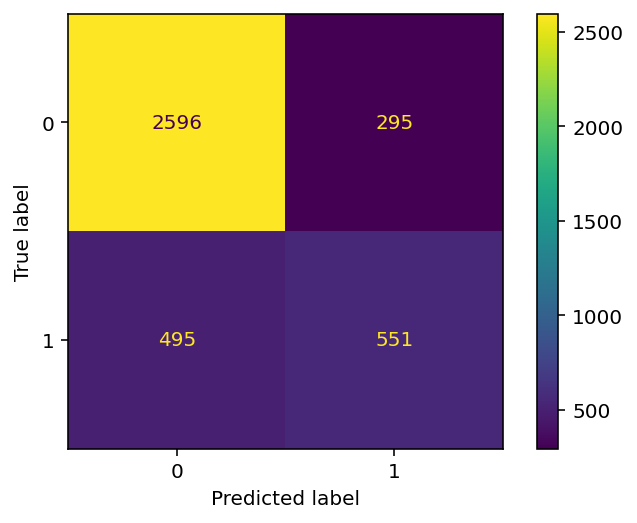

In [167]:
logit1 = LogisticRegression()
logit1.fit(X_train, y_train)
logit1_predictions = logit1.predict(X_train)
cm_l1 = confusion_matrix(y_train, logit1_predictions)
md.display_cm(cm_l1)
regression_scores['LR-1'] = md.count_scores(cm_l1, 'LR-1').iloc[:,1]

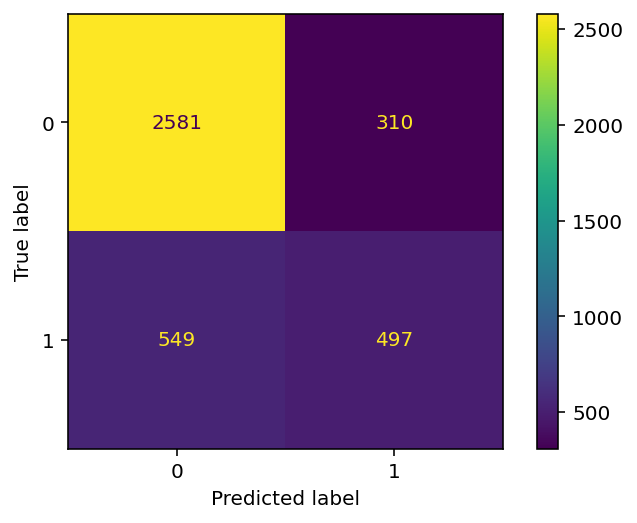

In [171]:
logit2 = LogisticRegression()
logit2.fit(X_train[features_knn], y_train)
logit2_predictions = logit2.predict(X_train[features_knn])
cm_l2 = confusion_matrix(y_train, logit2_predictions)
md.display_cm(cm_l2)

regression_scores['LR-2'] = md.count_scores(cm_l2, 'LR-2').iloc[:,1]

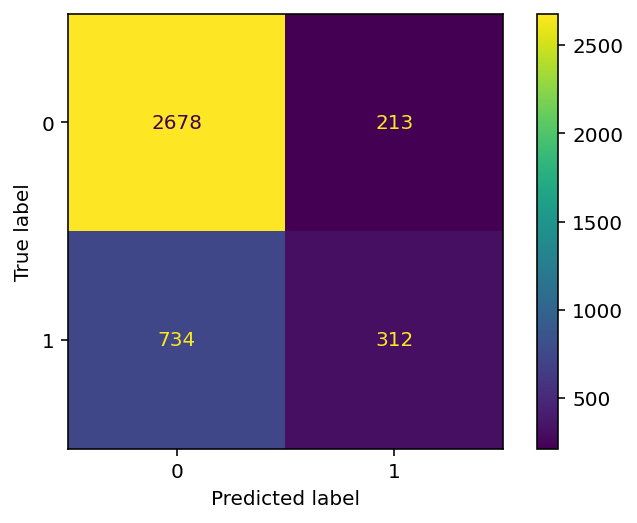

In [174]:
logit3 = LogisticRegression()
logit3.fit(X_train[features6], y_train)
logit3_predictions = logit3.predict(X_train[features6])
cm_l3 = confusion_matrix(y_train, logit3_predictions)
md.display_cm(cm_l3)

regression_scores['LR-3'] = md.count_scores(cm_l3, 'LR-3').iloc[:,1]

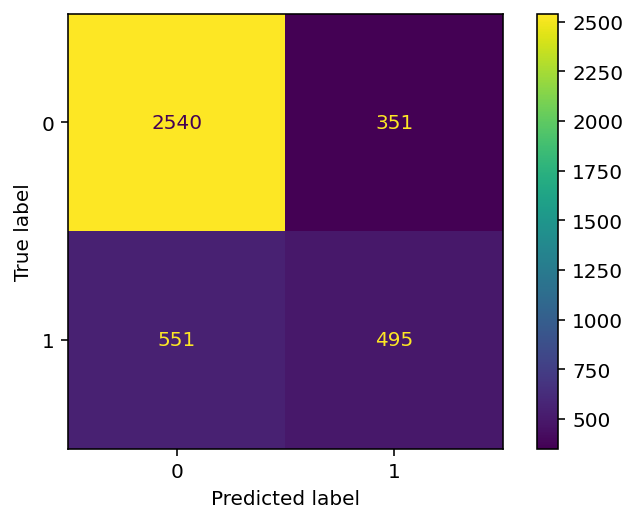

In [176]:
logit4 = LogisticRegression()
logit4.fit(X_train[features4], y_train)
logit4_predictions = logit4.predict(X_train[features4])
cm_l4 = confusion_matrix(y_train, logit4_predictions)
md.display_cm(cm_l4)

regression_scores['LR-4'] = md.count_scores(cm_l4, 'LR-4').iloc[:,1]

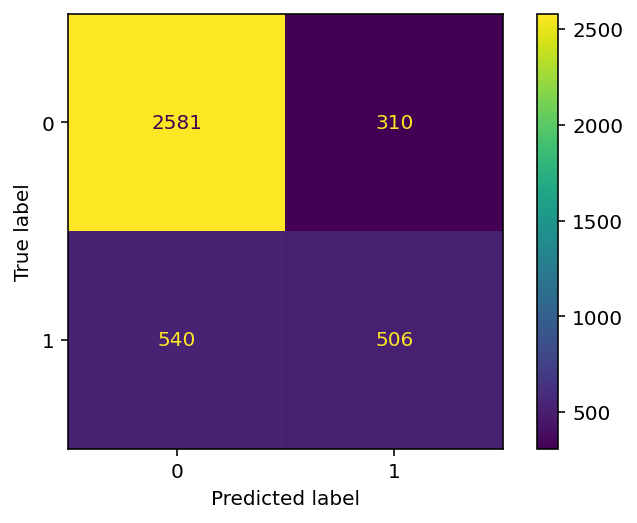

In [188]:
logit5 = LogisticRegression()
logit5.fit(X_train[features], y_train)
logit5_predictions = logit5.predict(X_train[features])
cm_l5 = confusion_matrix(y_train, logit5_predictions)
md.display_cm(cm_l5)

regression_scores['LR-5'] = md.count_scores(cm_l5, 'LR-5').iloc[:,1]

In [189]:
regression_scores

,index,LR-1,LR-2,LR-3,LR-4,LR-5
0,Accuracy,0.80,0.78,0.76,0.77,0.78
1,True Positive Rate /Recall,0.53,0.48,0.30,0.47,0.48
2,False Positive Rate,0.10,0.11,0.07,0.12,0.11
3,True Negative Rate,0.90,0.89,0.93,0.88,0.89
4,False Negative Rate,0.47,0.52,0.70,0.53,0.52
5,Precision,0.65,0.62,0.59,0.59,0.62
6,F1 Score,0.58,0.54,0.40,0.52,0.54
7,Support Positive,1046.00,1046.00,1046.00,1046.00,1046.00
8,Support Negative,2891.00,2891.00,2891.00,2891.00,2891.00


In [187]:
features = ['tenure',
  'contract_type_One year',
  'contract_type_Two year',
  'monthly_charges','payment_type_Credit card (automatic)' ]

Printout should read: <br>
Baseline: "number" "evaluation metric"

### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

## You may use this as a template for how to introduce your models:

### Model Type

In [ ]:
# Code that runs the best model in that model type goes here 
# (This may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on train: "evaluation result" <br>
"evaluation metric" on validate: "evaluation result"

### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [ ]:
# Code that runs the best overall model on test data (this may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summery
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**

# README

Your README should contain all of the following elements:

* **Title** Gives the name of your project
* **Project Description** Describes what your project is and why it is important 
* **Project Goal** Clearly states what your project sets out to do and how the information gained can be applied to the real world
* **Initial Hypotheses** Initial questions used to focus your project 
* **Project Plan** Guides the reader through the different stages of the pipeline as they relate to your project
* **Data Dictionary** Gives a definition for each of the features used in your report and the units they are measured in, if applicable
* **Steps to Reproduce** Gives instructions for reproducing your work. i.e. Running your notebook on someone else's computer.